In [2]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import FactorAnalyzer

<h1> Étape 1 : Importation des données </h1>

In [3]:
# Importer les données
country_data = pd.read_csv("Country-data.csv")

country_data.set_index('country', inplace=True)

# Renommer les colonnes pour correspondre à votre R script
country_data.columns = [
    "Décès_enfants",
    "Exportations_PIB",
    "Santé_PIB",
    "Importations_PIB",
    "Revenu_par_personne",
    "Inflation",
    "Espérance_de_vie",
    "Fécondité_totale",
    "PIB_par_habitant"
]

# Afficher les premières lignes
print(country_data.head())

                     Décès_enfants  Exportations_PIB  Santé_PIB  \
country                                                           
Afghanistan                   90.2              10.0       7.58   
Albania                       16.6              28.0       6.55   
Algeria                       27.3              38.4       4.17   
Angola                       119.0              62.3       2.85   
Antigua and Barbuda           10.3              45.5       6.03   

                     Importations_PIB  Revenu_par_personne  Inflation  \
country                                                                 
Afghanistan                      44.9                 1610       9.44   
Albania                          48.6                 9930       4.49   
Algeria                          31.4                12900      16.10   
Angola                           42.9                 5900      22.40   
Antigua and Barbuda              58.9                19100       1.44   

                  

<h1> Étape 2 : Analyse des valeurs manquantes</h1>

                     Nombre  Proportion (%)
Décès_enfants             0             0.0
Exportations_PIB          0             0.0
Santé_PIB                 0             0.0
Importations_PIB          0             0.0
Revenu_par_personne       0             0.0
Inflation                 0             0.0
Espérance_de_vie          0             0.0
Fécondité_totale          0             0.0
PIB_par_habitant          0             0.0


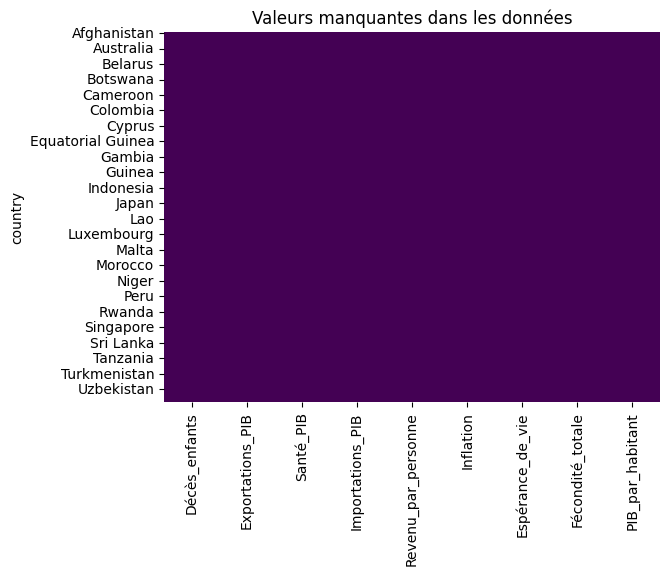

In [4]:
missing_values = country_data.isnull().sum()
missing_percentage = (missing_values / len(country_data)) * 100
print(pd.DataFrame({"Nombre": missing_values, "Proportion (%)": missing_percentage}))

# Visualisation des valeurs manquantes
sns.heatmap(country_data.isnull(), cbar=False, cmap='viridis')
plt.title("Valeurs manquantes dans les données")
plt.show()

<h1> Étape 3 : Description des variables quantitatives </h1>

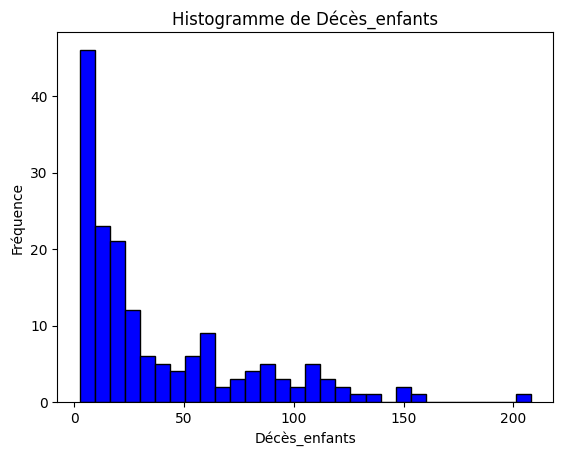

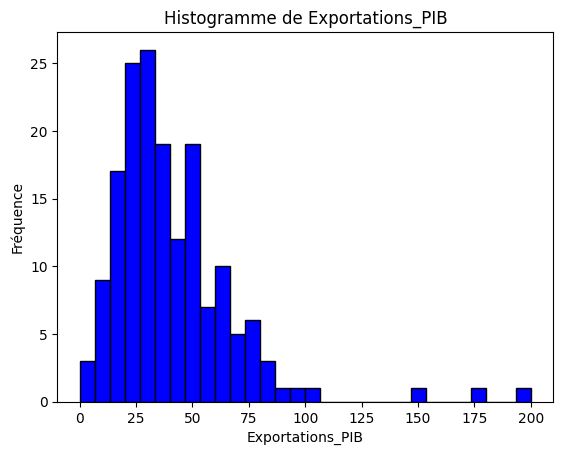

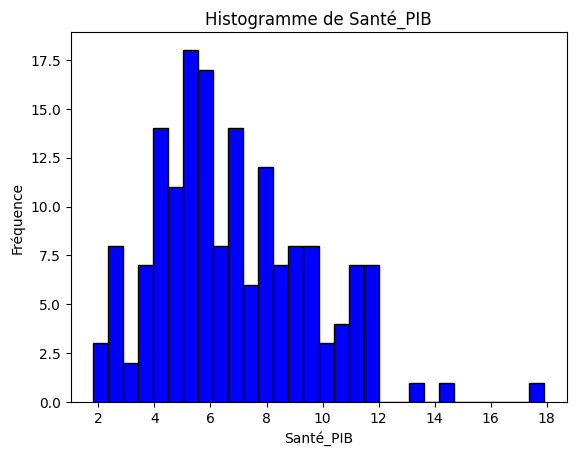

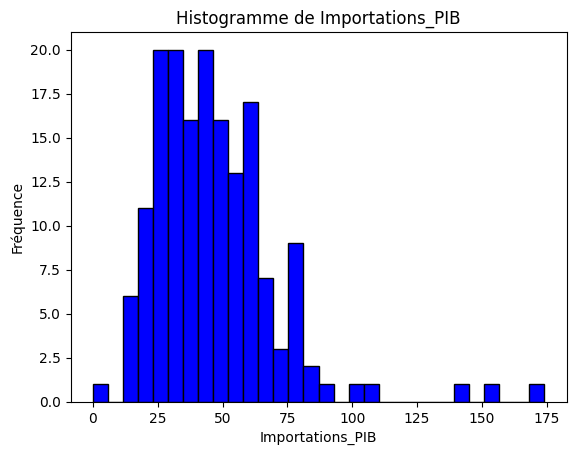

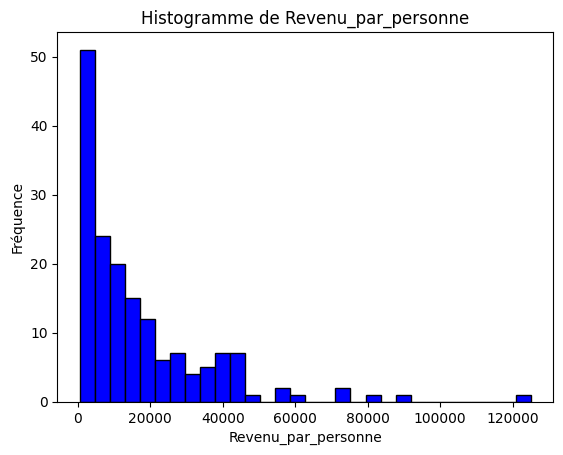

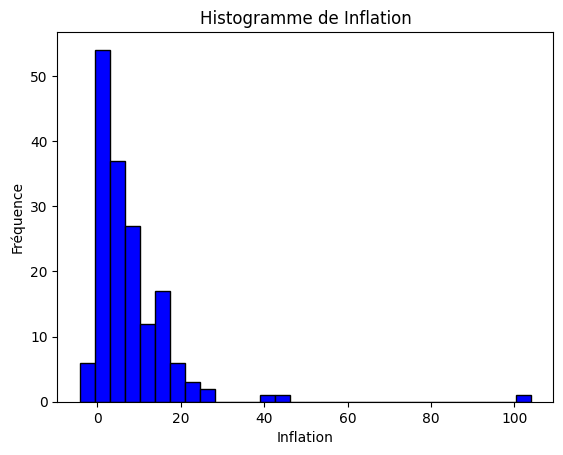

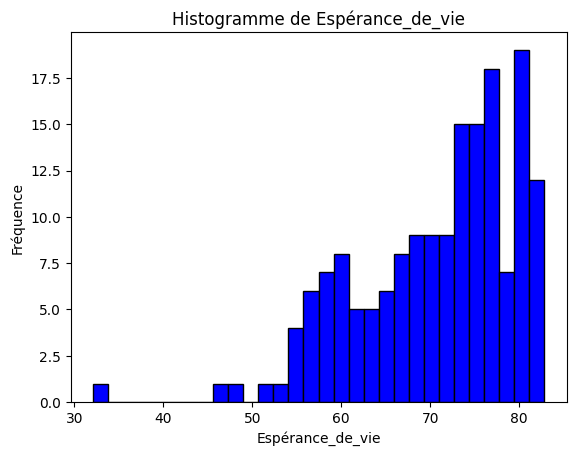

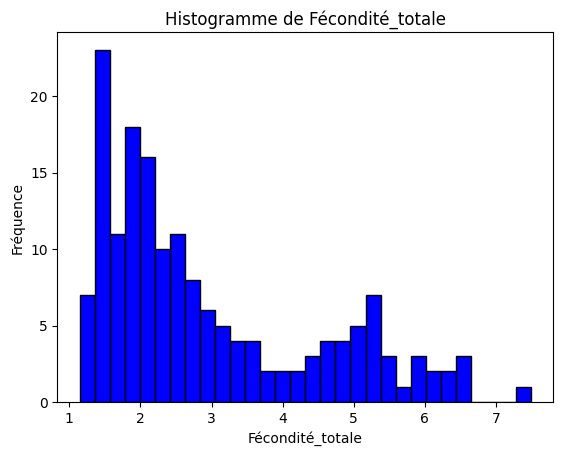

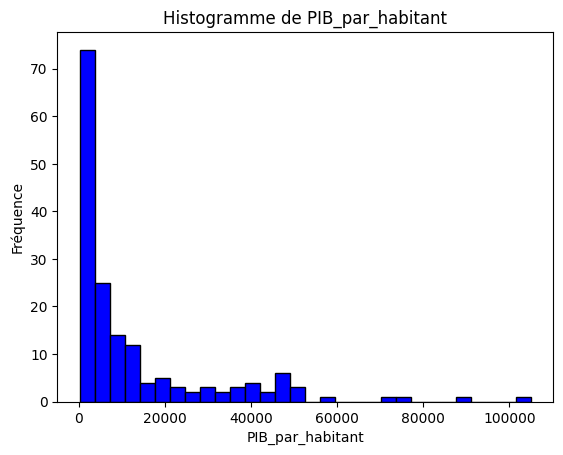

In [5]:
numeric_vars = country_data.select_dtypes(include=[np.number])
for column in numeric_vars.columns:
    plt.hist(numeric_vars[column], bins=30, color="blue", edgecolor="black")
    plt.title(f"Histogramme de {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.show()

<h1>  Étape 4 : Matrice de corrélation </h1>

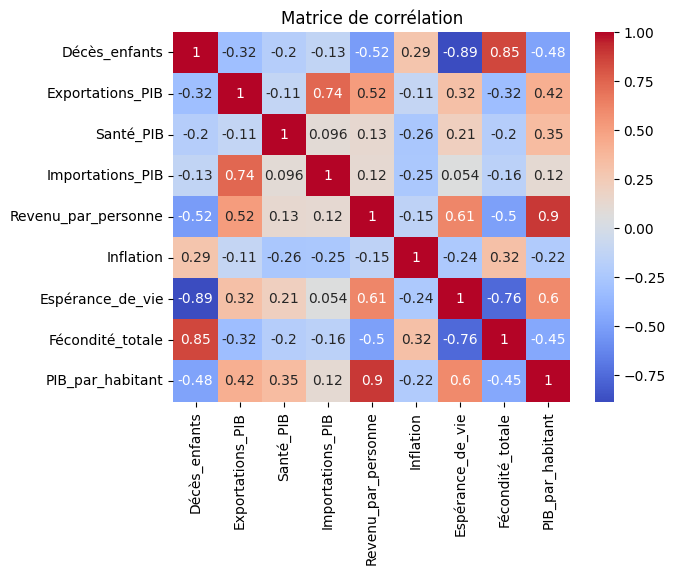

In [6]:
correlation_matrix = numeric_vars.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation")
plt.show()

<h1>  Étape 5 : Centrage et réduction des données </h1>

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_vars)

<h1>  Étape 6 : Réalisation de l'ACP </h1>

Variance expliquée : [45.95173979 17.18162565 13.0042589  11.05316181  7.34021142  2.48423468
  1.2604304   0.98128174  0.74305562]
Variance cumulée : [ 45.95173979  63.13336544  76.13762433  87.19078614  94.53099756
  97.01523224  98.27566264  99.25694438 100.        ]


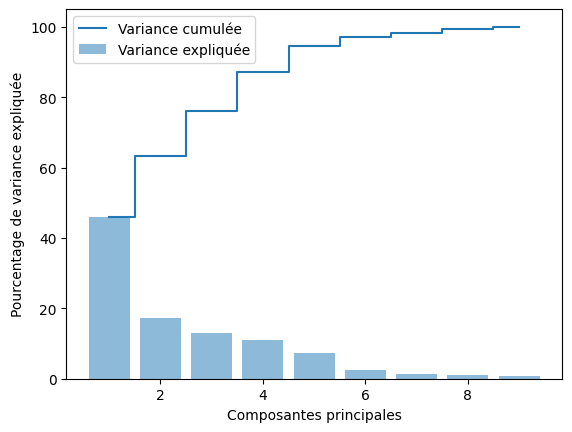

In [8]:
pca = PCA()
pca_result = pca.fit(data_scaled)

# Résumé des résultats de l'ACP (valeurs propres)
explained_variance_ratio = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Variance expliquée :", explained_variance_ratio)
print("Variance cumulée :", cumulative_variance)

# Visualisation du pourcentage de variance expliquée
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center', label='Variance expliquée')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Variance cumulée')
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance expliquée')
plt.legend(loc='best')
plt.show()

<h1>  Étape 7 : Cercle de corrélation (projection des variables) </h1>

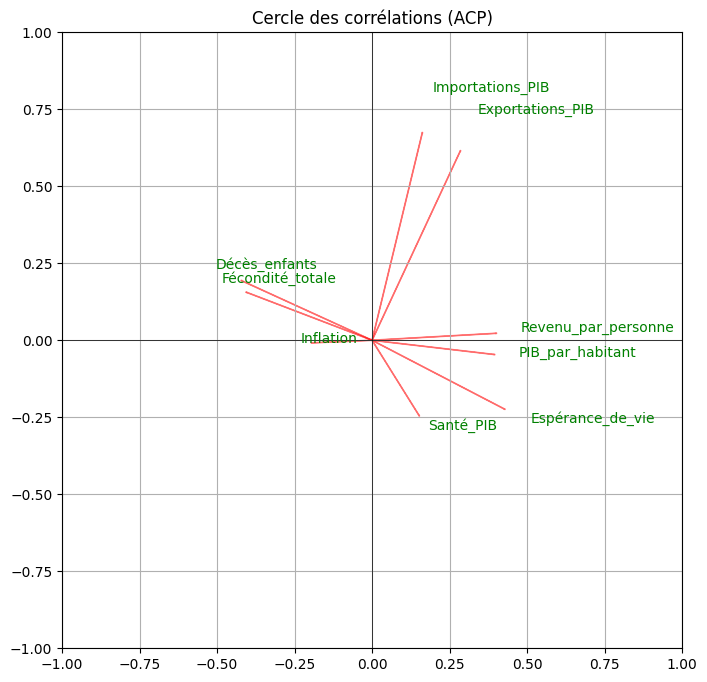

In [9]:
pca_components = pd.DataFrame(pca.components_, columns=numeric_vars.columns)
plt.figure(figsize=(8, 8))
for i in range(pca_components.shape[1]):
    plt.arrow(0, 0, pca_components.iloc[0, i], pca_components.iloc[1, i], color='r', alpha=0.5)
    plt.text(pca_components.iloc[0, i] * 1.2, pca_components.iloc[1, i] * 1.2, numeric_vars.columns[i], color='g')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.title('Cercle des corrélations (ACP)')
plt.show()

<h1>  Étape 8 : Biplot des individus et variables </h1>

C:\Users\ayoub\AppData\Local\Temp\ipykernel_8992\3835409272.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(scores["PC1"][i], scores["PC2"][i], country, fontsize=8, alpha=0.7)  # Ajouter les noms des pays


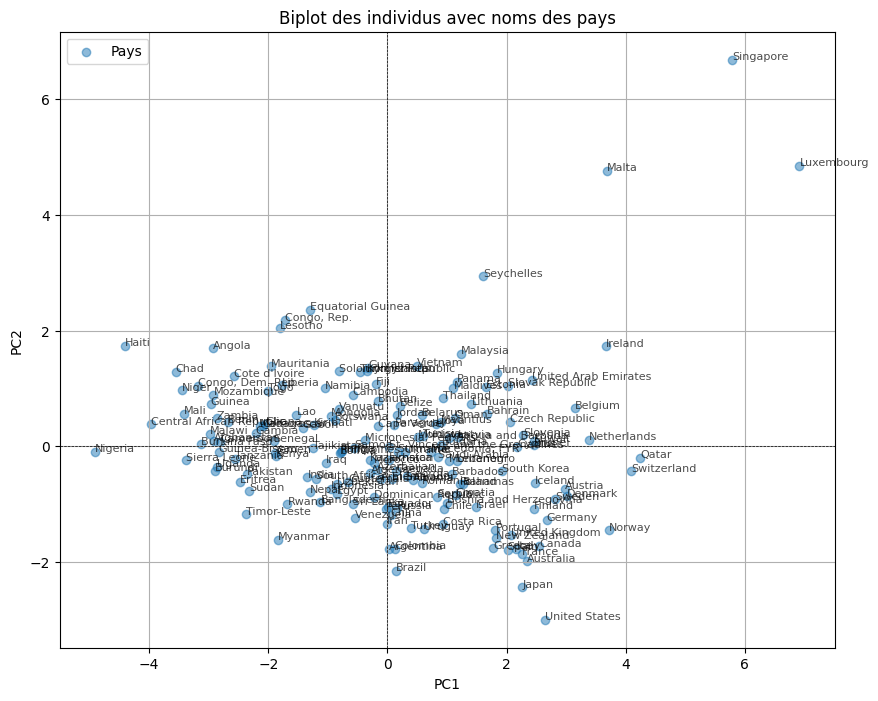

In [10]:
# Étape 8 : Biplot des individus et variables avec noms des pays
scores = pd.DataFrame(pca.transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])
scores.index = country_data.index  # Ajouter les noms des pays comme index

plt.figure(figsize=(10, 8))
plt.scatter(scores["PC1"], scores["PC2"], alpha=0.5, label='Pays')
for i, country in enumerate(scores.index):
    plt.text(scores["PC1"][i], scores["PC2"][i], country, fontsize=8, alpha=0.7)  # Ajouter les noms des pays

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Biplot des individus avec noms des pays")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()


<h1> Étape 9: Revenir aux données brutes pour interpréter</h1>


In [11]:
# 1. Contribution des variables sur les axes principaux
contrib_vars = pd.DataFrame(pca.components_.T, 
                            index=country_data.columns, 
                            columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("Contribution des variables sur les axes principaux :")
print(contrib_vars)

# 2. Contribution des individus (pays)
contrib_ind = pd.DataFrame(pca.transform(data_scaled), 
                           index=country_data.index, 
                           columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("Coordonnées des individus sur les axes principaux :")
print(contrib_ind)

# 3. Corrélation entre les axes principaux et les variables initiales
cor_axes_vars = pd.DataFrame(pca.components_, 
                             columns=country_data.columns, 
                             index=[f"PC{i+1}" for i in range(pca.n_components_)])
print("Corrélation entre les axes principaux et les variables initiales :")
print(cor_axes_vars.T)

# 4. Identifier les pays les plus influents sur les axes principaux
influential_countries = contrib_ind.abs().sort_values(by="PC1", ascending=False)
print("Pays les plus influents sur le premier axe :")
print(influential_countries.head())


Contribution des variables sur les axes principaux :
                          PC1       PC2       PC3       PC4       PC5  \
Décès_enfants       -0.419519  0.192884 -0.029544  0.370653 -0.168970   
Exportations_PIB     0.283897  0.613163  0.144761  0.003091  0.057616   
Santé_PIB            0.150838 -0.243087 -0.596632  0.461897  0.518000   
Importations_PIB     0.161482  0.671821 -0.299927 -0.071907  0.255376   
Revenu_par_personne  0.398441  0.022536  0.301548  0.392159 -0.247150   
Inflation           -0.193173 -0.008404  0.642520  0.150442  0.714869   
Espérance_de_vie     0.425839 -0.222707  0.113919 -0.203797  0.108220   
Fécondité_totale    -0.403729  0.155233  0.019549  0.378304 -0.135262   
PIB_par_habitant     0.392645 -0.046022  0.122977  0.531995 -0.180167   

                          PC6       PC7       PC8       PC9  
Décès_enfants       -0.200628  0.079489  0.682743 -0.327542  
Exportations_PIB     0.059333  0.707303  0.014197  0.123082  
Santé_PIB           -0.007276 